In [34]:
!pip install sorting
!pip install memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-py3-none-any.whl size=30190 sha256=d72c531569a151978e36cfd63fa319902060630065f3a46fd843771db189f76d
  Stored in directory: /root/.cache/pip/wheels/56/19/d5/8cad06661aec65a04a0d6785b1a5ad035cb645b1772a4a0882
Successfully built memory-profiler


In [46]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from timeit import default_timer as timer
from scipy.optimize import curve_fit
from heapq import heappop, heappush


plt.rcParams.update({'font.size': 18})

In [49]:
def heapsort(array):
    heap = []
    for element in array:
        heappush(heap, element)

    ordered = []

    # While we have elements left in the heap
    while heap:
        ordered.append(heappop(heap))

    return ordered


def nlogn_est(x, a):
    return a*x*np.log(x)


def measure_time(n_runs, n_experiments, func):
    times = []
    for i in range(n_runs):
        times.append([])
        for j in tqdm(range(1, n_experiments + 1)):
                v = np.random.rand(j)
                start_time = timer()
                func(v)
                times[i].append(timer() - start_time)         
    return np.array(times, dtype=np.float64).mean(axis=0)

def plot_times(avg_time, est_func, experiment_title):
    if est_func == nlogn_est:
        xdata = np.linspace(1, len(avg_time), len(avg_time)-1, dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata[1:])
    else:
        xdata = np.arange(len(avg_time), dtype=np.float64)
        ydata = np.array(avg_time, dtype=np.float64)
        popt, _ = curve_fit(est_func, xdata, ydata)
    plt.figure(figsize=(18, 9))
    plt.plot(avg_time)
    plt.title(f"{experiment_title}")
    plt.grid(True)
    plt.ylabel("time (s)")
    plt.xlabel("vector length")
    plt.plot(xdata, est_func(xdata, *popt),
             label='fit: a=%5.3f, ' % tuple(popt))
    plt.legend(["Experimental", "Theoretical"])
    plt.show()

100%|██████████| 2000/2000 [00:01<00:00, 1319.20it/s]


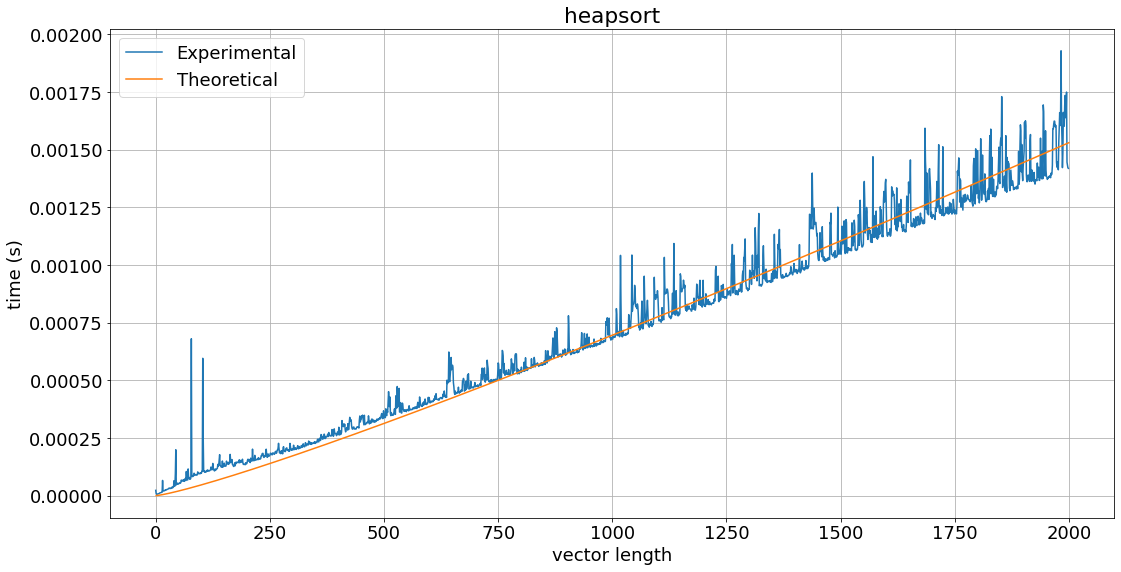

In [50]:
time_measured = measure_time(5, 2000, heapsort)
plot_times(time_measured, nlogn_est, "heapsort")
